Loom Video Link: 

In [84]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Task 1: 

In [85]:
# Loading in my dataset (csv file)
data = pd.read_csv('AirQualityUCI.csv', sep=';')

# There are two unnamed columns and I am removing them
first_row = data.iloc[0]
first_row
        
# I am coverting the date and time to a single datetime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')
data = data.drop(columns=['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

# I am replacing commas w/ dots and converting columns to numeric values
columns_to_convert = data.columns.drop('DateTime')
data[columns_to_convert] = data[columns_to_convert].replace(',', '.', regex=True).apply(pd.to_numeric)

# I am now displaying the cleaned data types and first few rows
data_cleaned = data.dropna().reset_index(drop=True)
data_cleaned.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


Task 2: 

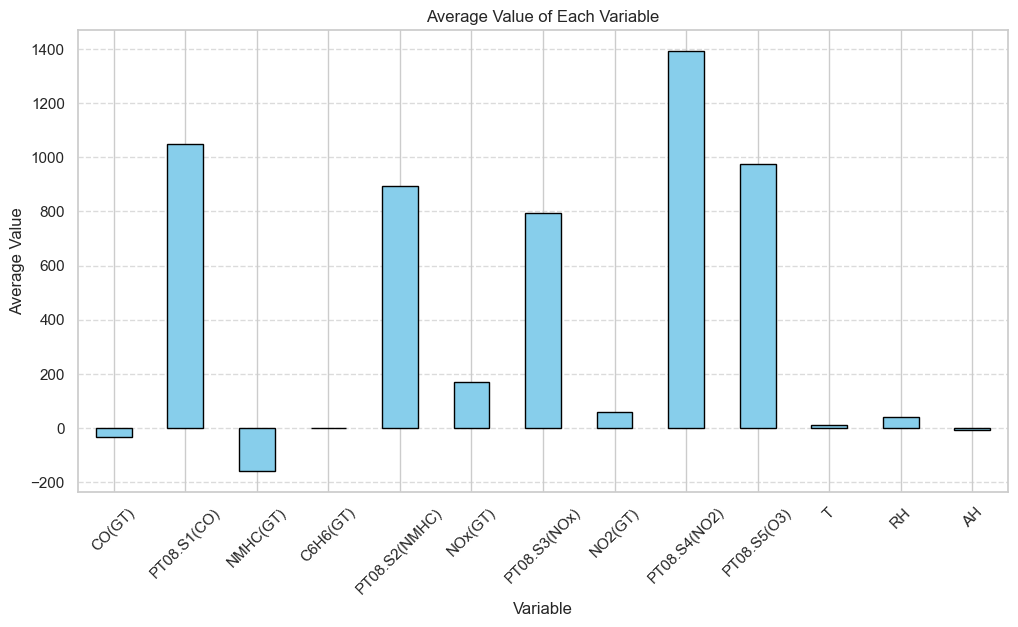

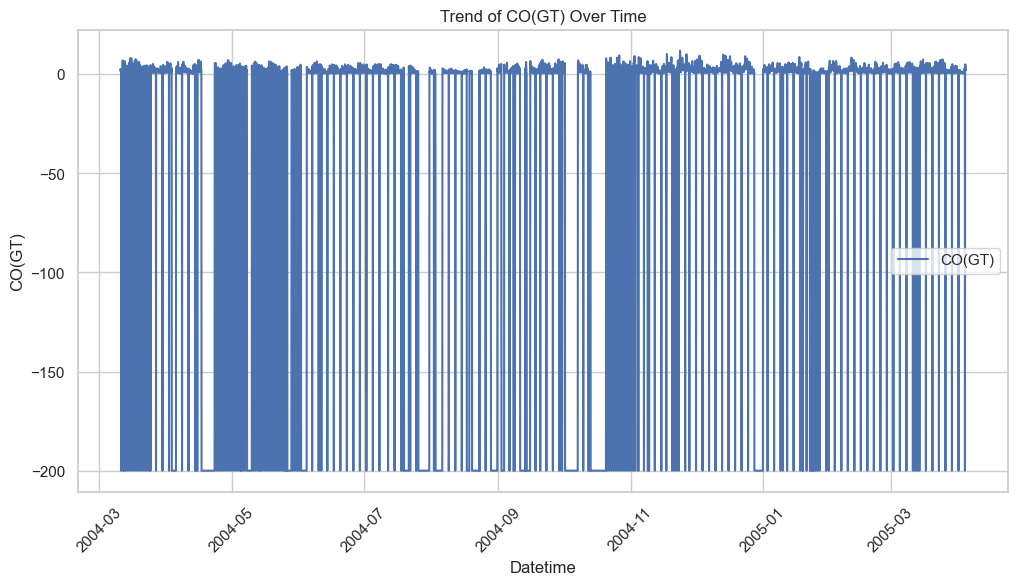

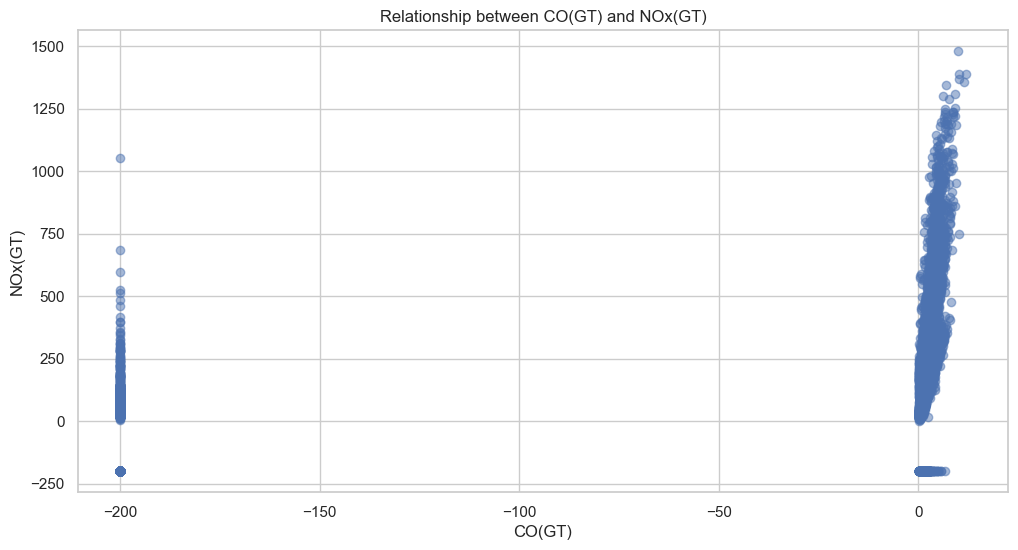

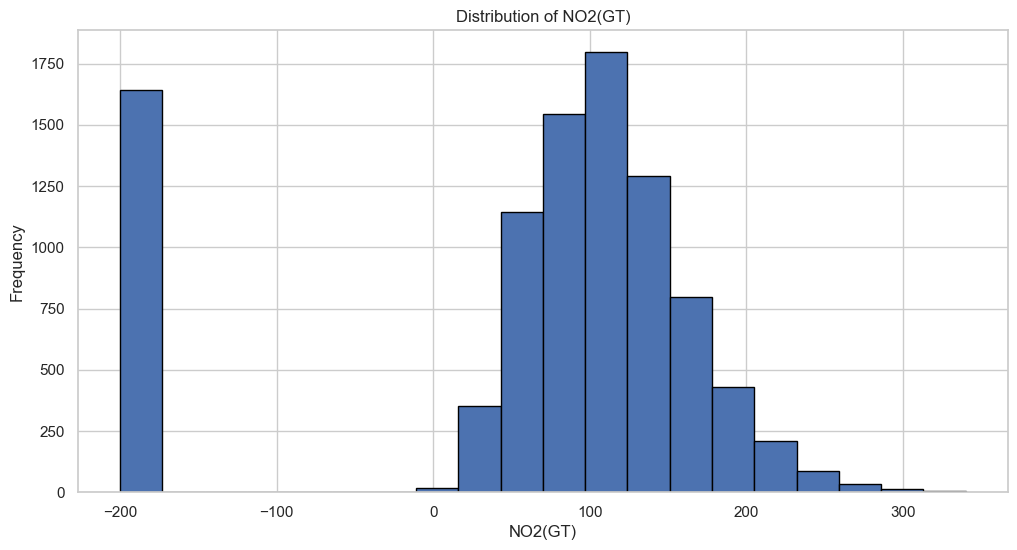

In [86]:
# Excluding the date and time
numeric_columns = data_cleaned.select_dtypes(include='number')

# Re-calculating the average values
average_values = numeric_columns.mean()

# My BAR CHART for the average value of each variable
plt.figure(figsize=(12,6))
average_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Value of Each Variable')
plt.ylabel('Average Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# My LINE CHART to show the trend of CO concentration over time
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['DateTime'], data_cleaned['CO(GT)'], label='CO(GT)')
plt.title('Trend of CO(GT) Over Time')
plt.xlabel('Datetime')
plt.ylabel('CO(GT)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# My SCATTER PLOT to show the relationship between CO and NOx
plt.figure(figsize=(12, 6))
plt.scatter(data_cleaned['CO(GT)'], data_cleaned['NOx(GT)'], alpha=0.5)
plt.title('Relationship between CO(GT) and NOx(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('NOx(GT)')
plt.show()

# My HISTOGRAM to show the distribution of NO2
plt.figure(figsize=(12, 6))
plt.hist(data_cleaned['NO2(GT)'], bins=20, edgecolor='black')
plt.title('Distribution of NO2(GT)')
plt.xlabel('NO2(GT)')
plt.ylabel('Frequency')
plt.show()

Task 3: The visualizations do a good job of showing important information from the air quality data, like average values, trends over time, and relationships between variables. The bar chart shows the average of each variable, the line chart tracks CO levels over time, the scatter plot shows how CO and NOx are related, and the histogram shows the spread of NO2 levels. However, the charts can be improved by making labels easier to read and using consistent colors across all charts to make them clearer and easier to compare.

Task 4: 

### Final Report: Air Quality Analysis for Environmental Scientists and Policy Makers

#### 1. Average Value of Each Variable
The bar chart shows the average values of different air quality measurements. The highest averages are found in the sensor responses for NO2 and O3, indicating significant levels of these pollutants. This chart gives a clear picture of which pollutants are most common in the area.

#### 2. Trend of CO(GT) Over Time
The line chart tracks carbon monoxide (CO) levels over time. The data shows ups and downs, with some periods having higher CO concentrations. These spikes help identify when CO pollution is the worst, which is important for planning actions during these times.

#### 3. Relationship Between CO(GT) and NOx(GT)
The scatter plot with a trend line shows a positive relationship between CO and nitrogen oxides (NOx). As CO levels go up, NOx levels also tend to rise. This information is useful for understanding how these pollutants are related and for developing strategies to reduce their levels.

#### 4. Distribution of NO2(GT)
The histogram shows how nitrogen dioxide (NO2) levels are spread out. Most values are within a specific range, with a clear peak showing the most common concentration. This helps understand typical NO2 exposure levels and identify times of high pollution.

### Conclusion
The improved visualizations make the air quality data easier to understand, showing key insights like average pollutant levels, trends over time, relationships between pollutants, and their distributions. These insights are crucial for scientists and policymakers to identify pollution sources, understand their impacts, and take effective actions to improve air quality and protect public health.

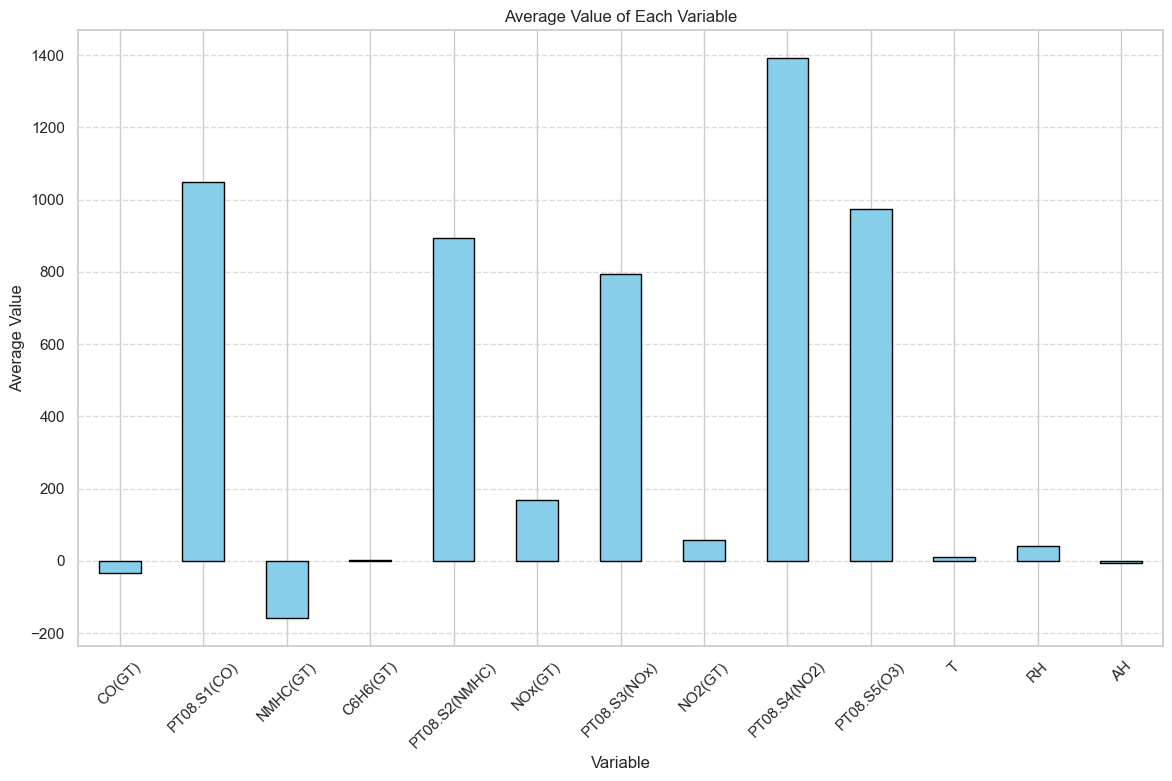

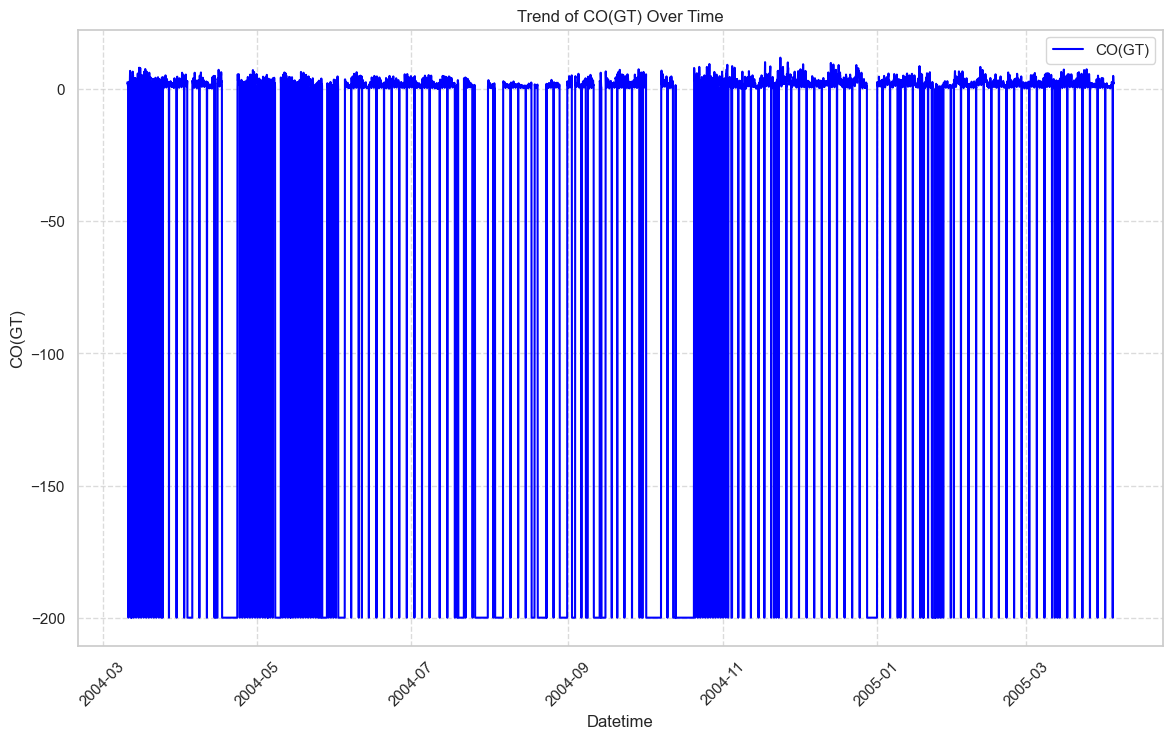

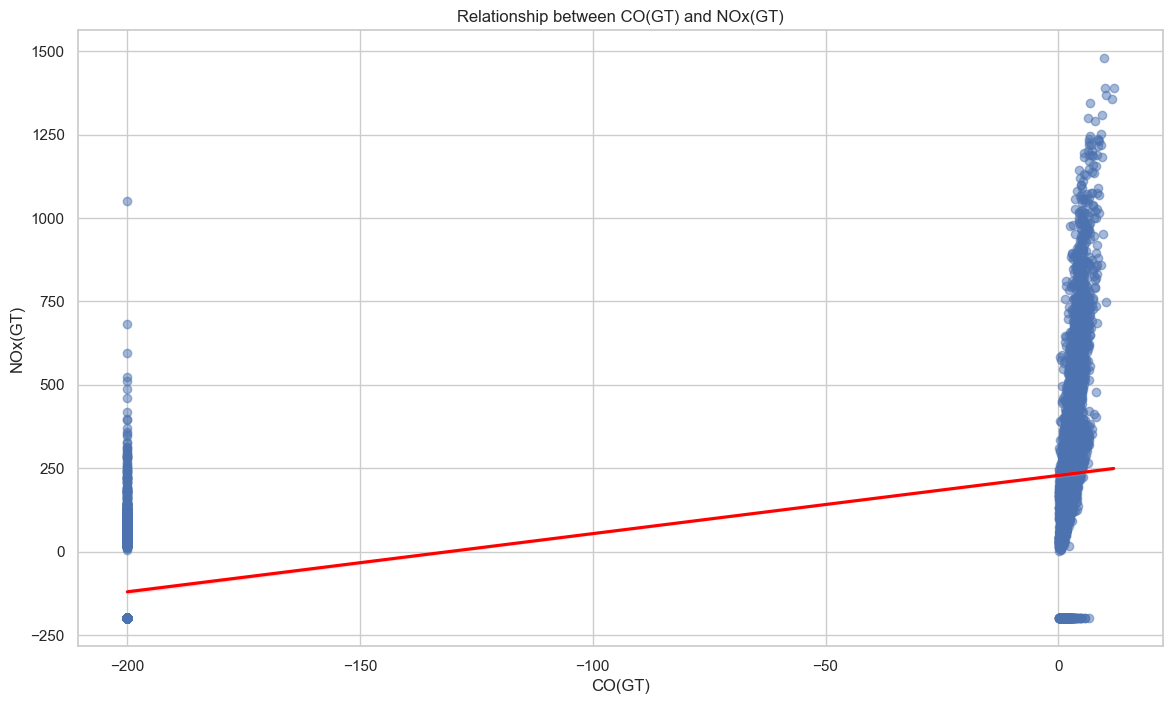

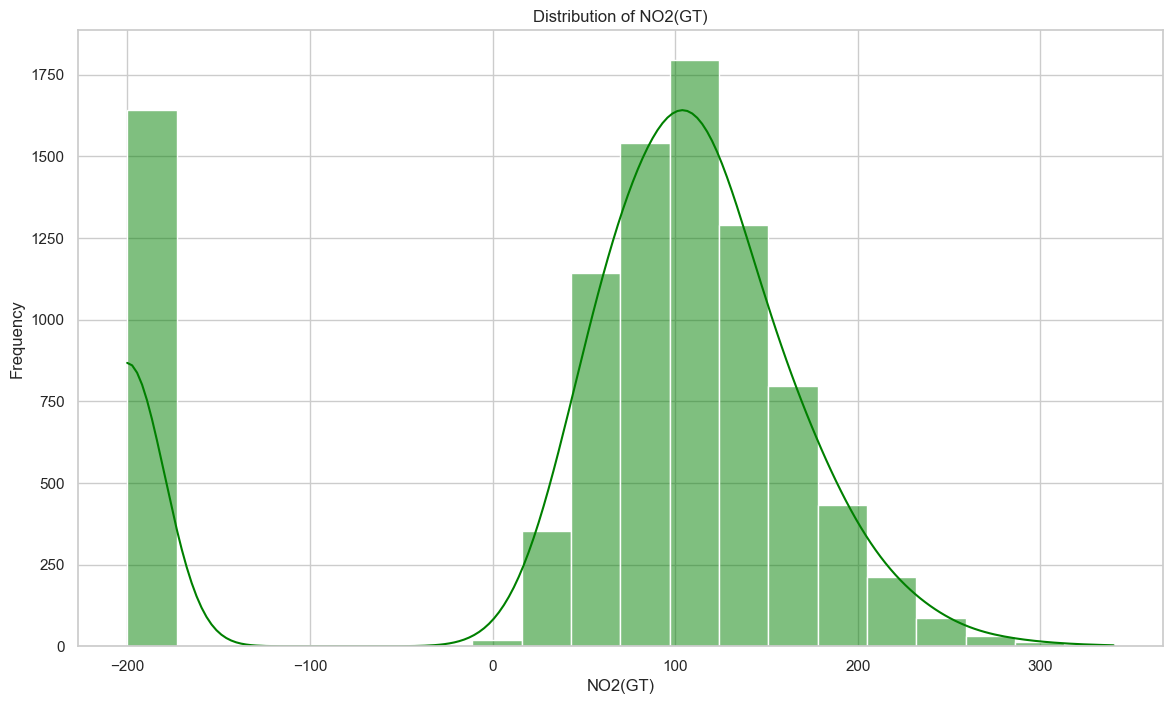

In [87]:
# Here is my improved BAR CHART
plt.figure(figsize=(14, 8))
average_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Value of Each Variable')
plt.ylabel('Average Value')
plt.xlabel('Variable')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Here is my improved LINE CHART
plt.figure(figsize=(14, 8))
plt.plot(data_cleaned['DateTime'], data_cleaned['CO(GT)'], label='CO(GT)', color='blue')
plt.title('Trend of CO(GT) Over Time')
plt.xlabel('Datetime')
plt.ylabel('CO(GT)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

# Here is my improved SCATTER PLOT
plt.figure(figsize=(14, 8))
sns.regplot(x=data_cleaned['CO(GT)'], y=data_cleaned['NOx(GT)'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between CO(GT) and NOx(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('NOx(GT)')
plt.show()

# Here is my improved HISTOGRAM
plt.figure(figsize=(14, 8))
sns.histplot(data_cleaned['NO2(GT)'], bins=20, kde=True, color='green')
plt.title('Distribution of NO2(GT)')
plt.xlabel('NO2(GT)')
plt.ylabel('Frequency')
plt.show()